In [1]:
import os
import scipy
import librosa
import numpy as np
import librosa.display
import soundfile as sf
import matplotlib.pyplot as plt
import IPython.display as ipd

%matplotlib inline

In [2]:
DATA_DIR = "data"

In [3]:
SR = 16000
WIN_LEN = int(SR * 0.05)
HOP_LEN = WIN_LEN // 4

In [4]:
def show_wave(wave, sr, lines=[]):
    fig, ax = plt.subplots(figsize=(10, 5))
    for line in lines:
        ax.axvline(x=line, c='red')
    librosa.display.waveplot(wave, sr=sr, ax=ax)
    ax.set(title='Waveform')
    ax.label_outer()


def show_spec(dbs):
    fig, ax = plt.subplots(figsize=(10, 5))

    w, h = dbs.shape
    img = librosa.display.specshow(dbs, y_axis='log', sr=SR, hop_length=HOP_LEN, x_axis='time', ax=ax)
    ax.set_title('Power spectrogram', size=14)
    fig.colorbar(img, ax=ax, format="%+2.0f dB")

    plt.show()
    

def show_frequency_spectrum(wave):
    x = wave - np.average(wave)  # zero-centering

    n = len(x)
    k = np.arange(n)
    tarr = n / float(SR)
    frqarr = k / float(tarr)  # two sides frequency range

    frqarr = frqarr[range(n // 2)]  # one side frequency range

    x = scipy.fft.fft(x) / n  # fft computing and normalization
    x = x[range(n // 2)]
    
    plt.figure(figsize=(15, 5))
    plt.plot(frqarr, abs(x), 'b')
    plt.title("Freq (Hz) distribution", size=14)
    plt.xlabel('Freq (Hz)', size=12)
    plt.ylabel('Density', size=12)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

In [5]:
waves = dict()
for fname in os.listdir(DATA_DIR):
    name = fname.split(".")[0]
    wave, sr = sf.read(os.path.join(DATA_DIR, fname), dtype=np.float32)
    assert sr == SR
    waves[name] = wave

### "А" низкая

In [6]:
ipd.display(ipd.Audio(waves["А_низк"], rate=sr))

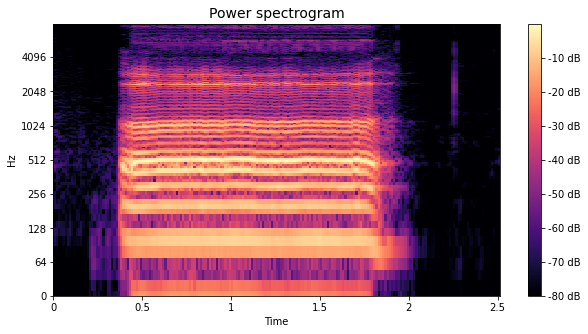

In [7]:
spec = np.abs(librosa.stft(waves["А_низк"], n_fft=WIN_LEN, win_length=WIN_LEN, hop_length=HOP_LEN, window="hann"))
dbs = librosa.amplitude_to_db(spec, ref=np.max)
show_spec(dbs)

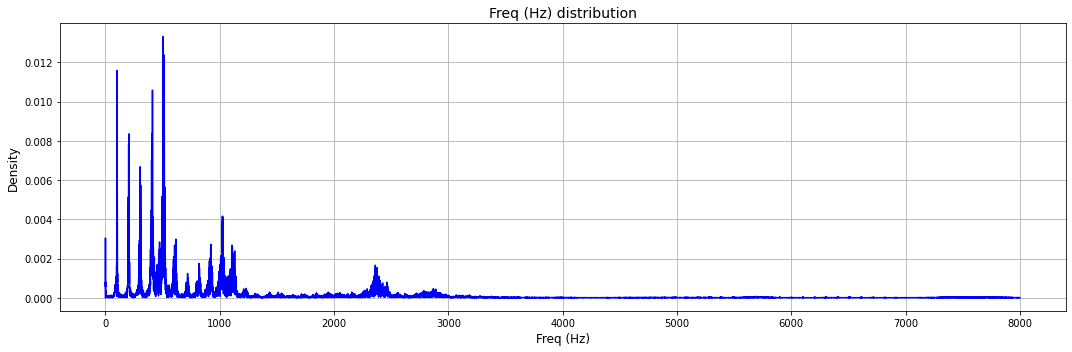

In [8]:
show_frequency_spectrum(waves["А_низк"])

**Минимальная частота**: 100 Hz
**Максимальная частота**: 1100 Hz

### "А" высокая

In [9]:
ipd.display(ipd.Audio(waves["А_выс"], rate=sr))

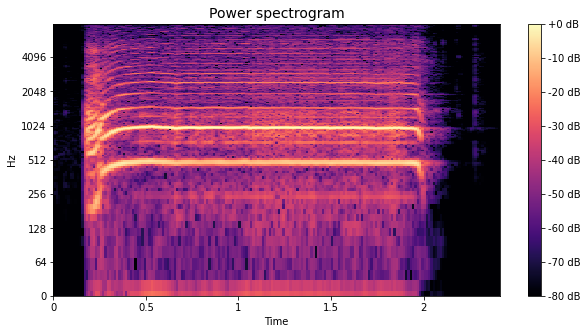

In [10]:
spec = np.abs(librosa.stft(waves["А_выс"], n_fft=WIN_LEN, win_length=WIN_LEN, hop_length=HOP_LEN, window="hann"))
dbs = librosa.amplitude_to_db(spec, ref=np.max)
show_spec(dbs)

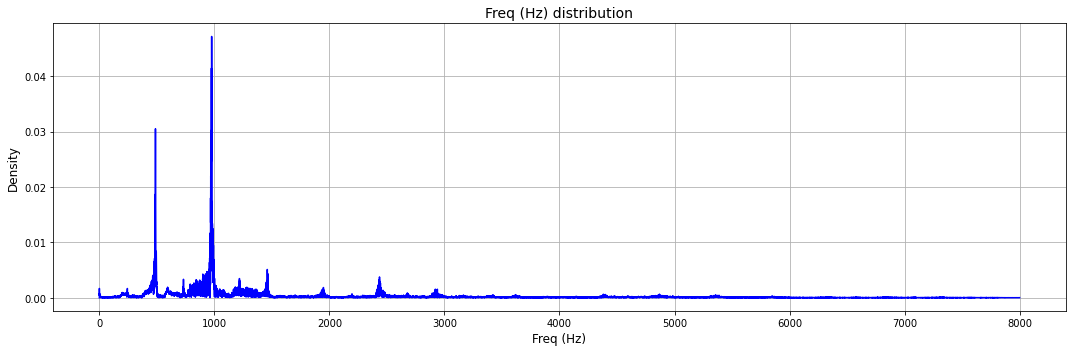

In [11]:
show_frequency_spectrum(waves["А_выс"])

**Минимальная частота**: 300 Hz
**Максимальная частота**: 1500 Hz

### "И" низкая

In [12]:
ipd.display(ipd.Audio(waves["И_низк"], rate=sr))

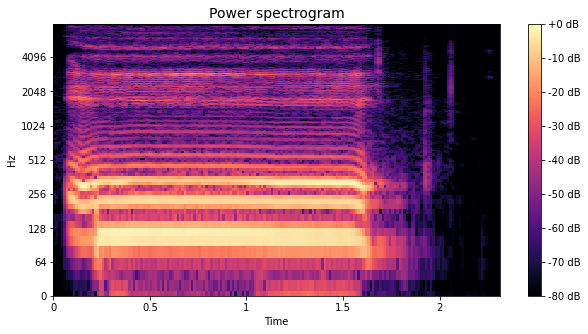

In [13]:
spec = np.abs(librosa.stft(waves["И_низк"], n_fft=WIN_LEN, win_length=WIN_LEN, hop_length=HOP_LEN, window="hann"))
dbs = librosa.amplitude_to_db(spec, ref=np.max)
show_spec(dbs)

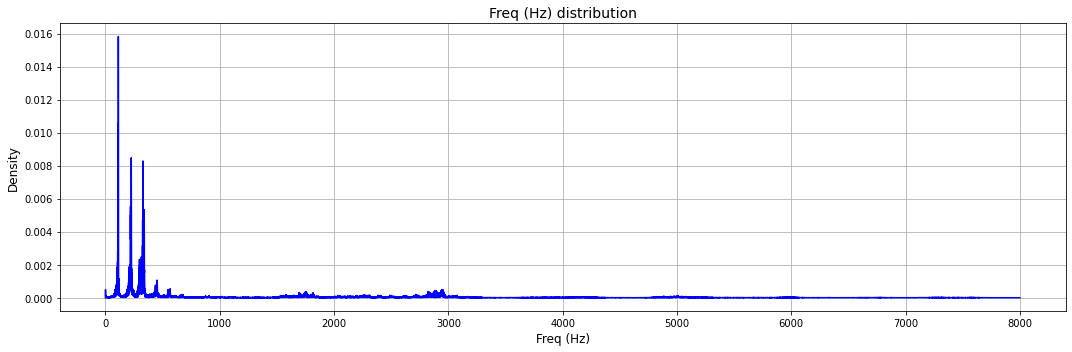

In [14]:
show_frequency_spectrum(waves["И_низк"])

**Минимальная частота**: 80 Hz
**Максимальная частота**: 400 Hz

### "И" высокая

In [15]:
ipd.display(ipd.Audio(waves["И_выс"], rate=sr))

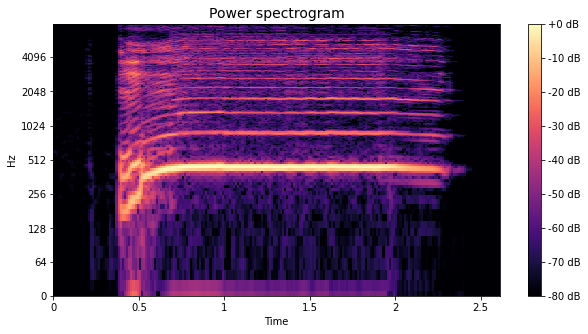

In [16]:
spec = np.abs(librosa.stft(waves["И_выс"], n_fft=WIN_LEN, win_length=WIN_LEN, hop_length=HOP_LEN, window="hann"))
dbs = librosa.amplitude_to_db(spec, ref=np.max)
show_spec(dbs)

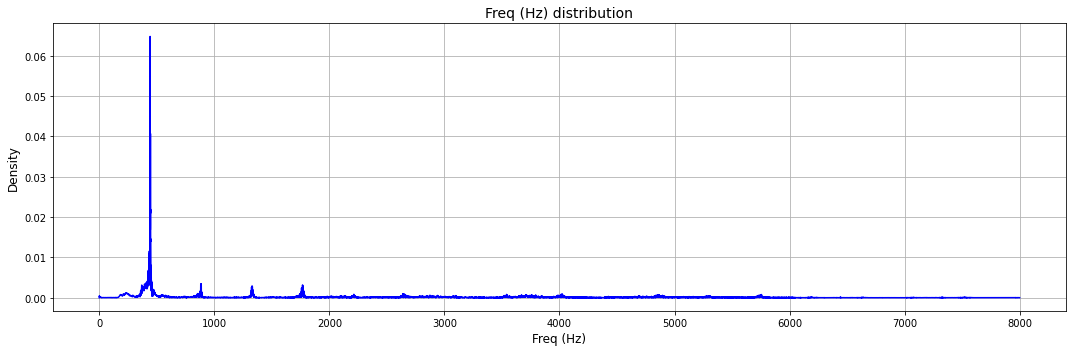

In [17]:
show_frequency_spectrum(waves["И_выс"])

**Минимальная частота**: 300 Hz
**Максимальная частота**: 500 Hz